## Los Datos

Los  datos que se proporciona consisten en dos conjuntos de archivos que, en conjunto, describen el comportamiento de los clientes dentro de un programa de lealtad de una aerolínea. 

### Customer Flight Analysis.csv

Este archivo contiene información sobre la actividad de vuelo de los clientes, incluyendo el número de vuelos reservados, la distancia volada, puntos acumulados y redimidos, y costos asociados a los puntos redimidos

- **Loyalty Number:** Este atributo representa un identificador único para cada cliente dentro del programa de lealtad de la aerolínea. Cada número de lealtad corresponde a un cliente específico.
- **Year:** Indica el año en el cual se registraron las actividades de vuelo para el cliente.
- **Month:** Representa el mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.
- **Flights Booked:** Número total de vuelos reservados por el cliente en ese mes específico.
- **Flights with Companions:** Número de vuelos reservados en los cuales el cliente viajó con acompañantes.
- **Total Flights:** El número total de vuelos que el cliente ha realizado, que puede incluir vuelos reservados en meses anteriores.
- **Distance:** La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado durante el mes.
- **Points Accumulated:** Puntos acumulados por el cliente en el programa de lealtad durante el mes, con base en la distancia volada u otros factores.
- **Points Redeemed:** Puntos que el cliente ha redimido en el mes, posiblemente para obtener beneficios como vuelos gratis, mejoras, etc.
- **Dollar Cost Points Redeemed:** El valor en dólares de los puntos que el cliente ha redimido durante el mes.

### Customer Loyalty History.csv

Este archivo proporciona un perfil detallado de los clientes, incluyendo su ubicación, nivel educativo, ingresos, estado civil, y detalles sobre su membresía en el programa de lealtad (como el tipo de tarjeta, valor de vida del cliente, y fechas de inscripción y cancelación).

- **Loyalty Number:** Identificador único del cliente dentro del programa de lealtad. Este número permite correlacionar la información de este archivo con el archivo de actividad de vuelos.
- **Country:** País de residencia del cliente.
- **Province:** Provincia o estado de residencia del cliente (aplicable a países con divisiones provinciales o estatales, como Canadá).
- **City:** Ciudad de residencia del cliente.
- **Postal Code:** Código postal del cliente.
- **Gender:** Género del cliente (ej. Male para masculino y Female para femenino).
- **Education:** Nivel educativo alcanzado por el cliente (ej. Bachelor para licenciatura, College para estudios universitarios o técnicos, etc.).
- **Salary:** Ingreso anual estimado del cliente.
- **Marital Status:** Estado civil del cliente (ej. Single para soltero, Married para casado, Divorced para divorciado, etc.).
- **Loyalty Card:** Tipo de tarjeta de lealtad que posee el cliente. Esto podría indicar distintos niveles o categorías dentro del programa de lealtad.
- **CLV (Customer Lifetime Value):** Valor total estimado que el cliente aporta a la empresa durante toda la relación que mantiene con ella.
- **Enrollment Type:** Tipo de inscripción del cliente en el programa de lealtad (ej. Standard).
- **Enrollment Year:** Año en que el cliente se inscribió en el programa de lealtad.
- **Enrollment Month:** Mes en que el cliente se inscribió en el programa de lealtad.
- **Cancellation Year:** Año en que el cliente canceló su membresía en el programa de lealtad, si aplica.
- **Cancellation Month:** Mes en que el cliente canceló su membresía en el programa de lealtad, si aplica.

##  Ejercicio

### Fase 1: Exploración y Limpieza
 
1. **Exploración Inicial:**

   - Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

   - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

   - Une los dos conjuntos de datos de la forma más eficiente. 


In [ ]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np




# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames



In [10]:
# carga de datos
ruta_activity = "Customer Flight Activity.csv"
ruta_history = "Customer Loyalty History.csv"

df_actividad = pd.read_csv(ruta_activity)

df_historial = pd.read_csv(ruta_history)

In [11]:
 # vista rápida con estilo práctico
print("Customer Flight Activity shape:", df_actividad.shape)
display(df_actividad.sample(5))
display(df_actividad.info())

print("Costumer Loylalty History - Shape:", df_historial.shape)
display(df_historial.sample(5))
display(df_historial.info())

Customer Flight Activity shape: (405624, 10)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
61547,241641,2017,3,10,6,16,4432,443.0,548,44
103284,201115,2017,7,16,11,27,1755,175.0,0,0
3063,264053,2017,1,0,0,0,0,0.0,0,0
227426,511226,2018,2,0,0,0,0,0.0,0,0
57822,480275,2017,4,12,3,15,3285,328.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


None

Costumer Loylalty History - Shape: (16737, 16)


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
4745,303396,Canada,Ontario,Ottawa,K1G 4Z0,Female,Bachelor,49446.0,Married,Nova,3090.13,Standard,2014,8,2017.0,1.0
10127,500026,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Married,Star,2316.80,Standard,2017,9,NaN,NaN
14625,102311,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,76485.0,Single,Star,7507.46,Standard,2016,10,NaN,NaN
5334,349638,Canada,British Columbia,Whistler,V6T 1Y8,Male,High School or Below,52703.0,Divorced,Nova,3707.28,Standard,2013,5,NaN,NaN
6136,215051,Canada,Ontario,Kingston,M9K 2P4,Female,Bachelor,85887.0,Divorced,Nova,4822.44,Standard,2017,11,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

None

- **Uso de shape**: me permite saber cuántas filas y columnas tiene cada dataset. es util para detectar si hay demasiados registros o si faltan datos inesperadamente.

- ***Uso de sample(5)***: decido mostrar 5 filas aleaotrias, me parece mejor opción que el head() porque así veo variedad real del contenido y no solo el principio del archivo, además también me ayuda a detectar valores raros a simple vista (por ejemplo: distancias negativas, puntos extraños o nombres mal escritos)

- ***Uso de info()***: para compara tipos de datos y saber si hay valores nulos

In [12]:
# Recuento de nulos por columnas (absolutos y % de 2 decimales)
nulos_act = df_actividad.isnull().sum().to_frame("nulos_abs")
nulos_act["nulos_pct"] = (nulos_act["nulos_abs"] / len(df_actividad)*100).round(2)

nulos_hist = df_historial.isnull().sum().to_frame("nulos_abs")
nulos_hist["nulos_pct"] = (nulos_hist["nulos_abs"] / len(df_historial)*100).round(2)

print("Nulos - Costumer Flight Activity")
display(nulos_hist[nulos_hist["nulos_abs"]>0].sort_values("nulos_pct", ascending=False))

print("\nNulos - Costumer Loyalty History")
display(nulos_hist[nulos_hist["nulos_abs"]>0].sort_values("nulos_pct", ascending=False))

Nulos - Costumer Flight Activity


,nulos_abs,nulos_pct
Cancellation Year,14670,87.65
Cancellation Month,14670,87.65
Salary,4238,25.32



Nulos - Costumer Loyalty History


,nulos_abs,nulos_pct
Cancellation Year,14670,87.65
Cancellation Month,14670,87.65
Salary,4238,25.32


***Customer Flight Activity** 
- No se detectan nulos en la columna del fichero de actividad (todas las columnas muestran 0 nulos).
 ***Consecuencia***: los datos de actividad parecen completos; seguimos a la siguiente fase.

 ***Customer loyalty History**
  - "Salary": tiene **4238 nulos** o lo que es lo mismo **25.32%**.
     - **Posibles acciones:** 
       -Imputar con **mediana** si queremos conservar la variable y creemnos que los nulos son aleatorios.
       - Usar **KNN/IterativeImputer** si su imputacion debe aprovechar relaciones con otras variables.
       - Dejar como "NAN" Y Crear una columna boleana llamada "Salary_missing" para moldeado o analisis por grupos.
    - "Cancellation year": tiene ***14670 nulos** o lo que es lo mismo  **87.65%**.
    -"Cancelation Month": tiene ***14670 nulos** o lo que es lo mismo  **87.65%**.
     -**Observación:** son porcentajes muy altos. etas columnas están vacias la mayoría porque   **Sólo aplican a clientes que cancelaron**.
       - **Posibles acciones:** 
           - Crear una **columna bolleana** "cancelado" = True/False si "Cancellation Year" es no-nulo; dejar las columnas de año/mes como están (información últil solo para los cancelados). 
          - No imputar año/mes por ser mayoritariamente no aplicable; imputar aqui no tendría sentido. **revisar respuesta**
          - Si la columba representa algo diferente, investigar el origen; pero lo más lógico es  tratar estos campos como condicionales (solo rellenar si  "cancelado=True").

In [13]:
# Comparación si alguna columna existe en ambos dataframes
if ("Loyalty Number" in df_actividad.columns) and ("Loyalty Number" in df_historial.columns):
    df = df_actividad.merge(df_historial, on="Loyalty Number", how="left", suffixes=("_act", "_hist"))
else:
    df = df_actividad.copy()
    print("Clave 'Loyalty Number' no encontrada en ambos ficheros; trabajando solo con df_actividad.")  

display(df.head(5))    

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


- He hecho un **left join** de actividad con el historial: "actividad < - historial".
- Razón: se quieren conservar **todas las filas de actividad** (cada reserva/registro) y añadir el perfil del cliente cuando exista.
- Si hay actividad sin perfil, lo veremos como "NAN" en las columnas del perfil; eso no se elimina automatifamente porque puede indicar clientes nuevos o registros no emparejados (info útil)

In [9]:
# Recuento de nulos en el dataframe unido
nulos = df.isnull().sum().to_frame(name="nulos_abs")
nulos["nulos_pct"] = (nulos["nulos_abs"] / len(df)*100).round(2)

# Mostrar solo columnas ordenadas con nulos (ordenadas por % descendente)
display(nulos[nulos["nulos_abs"]>0].sort_values("nulos_pct", ascending=False))

,nulos_abs,nulos_pct
Cancellation Year,355560,87.66
Cancellation Month,355560,87.66
Salary,102672,25.31


- Lista clara de **que columnas del dataset final** (merged) tienen nulos y que porcentaje.
- Esto decide la estrategia: si el % es pequeño, normalmente imputamos; si es muy grande (ej. >50-60%), se considera que la columna no aplica o no es útil y se podrían valorar oreas soluciones (creacion de columnas, eliminación etc,).
- En este caso se ve que "Salary" y "Cancellation Year/Month" son las columnas con más nulos.

In [18]:
df.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,cancelado
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,False
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,False


2. **Limpieza de Datos:**
   - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
   - Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
   - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [21]:
# crear flag "cancelado" según si existe Cancellation Year
if "Cancellation Year" in df.columns:
    df["cancelado"] = df["Cancellation Year"].notna()
else:
    df["cancelado"] = False
df.head(2)    

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,cancelado
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,False
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,False


## Flag "cancelado"
He creado una nueva columna llamada **cancelado**, que indica si un cliente tiene datos de canelación.
 - si "Cancellation Year" No es nulo -el canceló.
 - Sí es nulo -no canceló
No se imputan estas columnas porque los nulos significan "no aplica" 

In [24]:
# Imputación simple del salario usadndo la mediana
if "Salary" in df.columns:
    df["salary_original_nan"] = df["Salary"].isna() #marca dónde falta
    mediana_salary = df["Salary"].median()
    df["Salary_imputado"] = df["Salary"].fillna(mediana_salary)
else:
    print("No existe Salary en el dataset")    
df.head(5)    


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,cancelado,salary_original_nan,Salary_imputado
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,False,False,92552.0
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,False,True,73479.0
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,False,True,73479.0
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,False,False,63253.0
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,False,False,91163.0


## Imputación de Salary con la mediana
La columna Salary tenía un 25% de nulos.
Como es una variable importante, he imputado estos valores usando la **mediana**:
 - Es una media rovusta frente a valores extremos.
 - Es facil de explicar y entender.
 - Evita los erroes que surgen al intentar usar métodos avanzados en columnas que no son numéricas.
Tambien he creado "Salary ogriginal nan" para identificar que filas fueron imputadas. 


In [31]:
# Conversión de columnas numéricas importantes
columnas_numéricas = ["Distance", "Points Accumulated", "Points Redeemed", "Dollar Cost Points Redeemed", "Flights Booled", "Total Flight"] 

for col in columnas_numéricas:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

## Ajuste de tipos numéricos
Algunas columnas pueden venir como texto aunque deberían ser numéricas.
uso "pd.to_numeric(...,errors="coerce"), que convierte los valores incorrectos en NaN.
De esta manera puedo:
 - Calcular medias,
 - hacer gráficas,
 - Evitar errores en análisis posteriores.
No se imputan los NaN todavía porque primero hay qeu ver cuanots aparecen. 

### Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:  

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 
6. ¿Cómo se distribuyen los clientes según su estado civil y género?


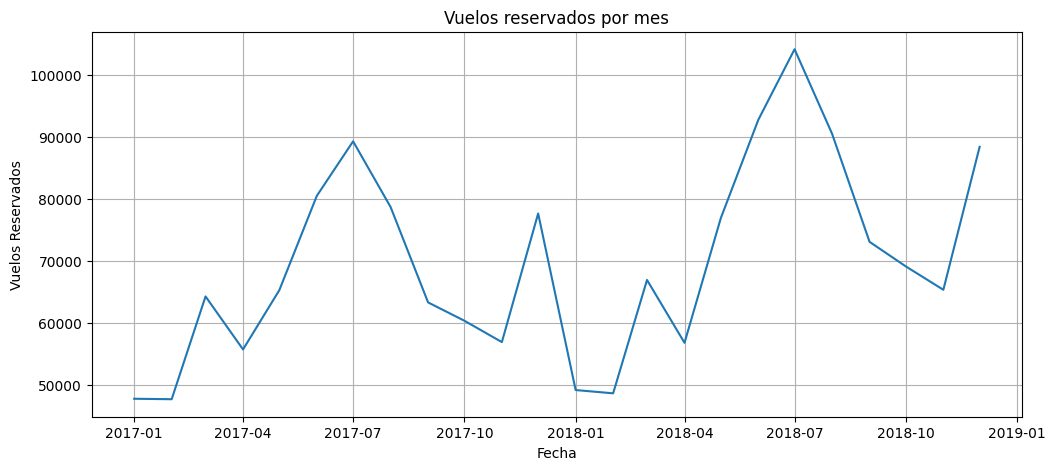

In [46]:
# Dsitribución de vuelos reservados por mes

# Agrupo por año y mes, y sumo los vuelos reservados
vuelos_por_mes = df.groupby(["Year", "Month"]) ["Flights Booked"].sum().reset_index()

# Creo una columna fecha para ordenar correctamente
vuelos_por_mes["fecha"] = pd.to_datetime(
    vuelos_por_mes["Year"].astype(str) + "-" + vuelos_por_mes["Month"].astype(str) + "-01"

)
 # Ordeno los datos por fecha
vuelos_por_mes = vuelos_por_mes.sort_values("fecha") 

plt.figure(figsize=(12,5))
sns.lineplot(data=vuelos_por_mes, x="fecha", y="Flights Booked", markers="o")
plt.title("Vuelos reservados por mes")
plt.xlabel("Fecha")
plt.ylabel("Vuelos Reservados")
plt.grid(True)
plt.show()

He ultilizado esta grafica de línea porque creo que es la más adecuada para mostrar la evolución de los vuelos reservados a lo largo del tiempo. Nos permite ver si hay picos estacionales, meses con más actividad y posibles tnedencia a largo plazo.
La grafica permite detectar:

    - Meses donde aumentan los vueloes (picos)
    - Medes donde disminuyen (los valles)
    - Si existe un patron receptivo del comportamiento de los clientes.
Esto ayuda a identificar la estacionalidad y planificar estrategias comerciales según los momentos de mayor demanda.

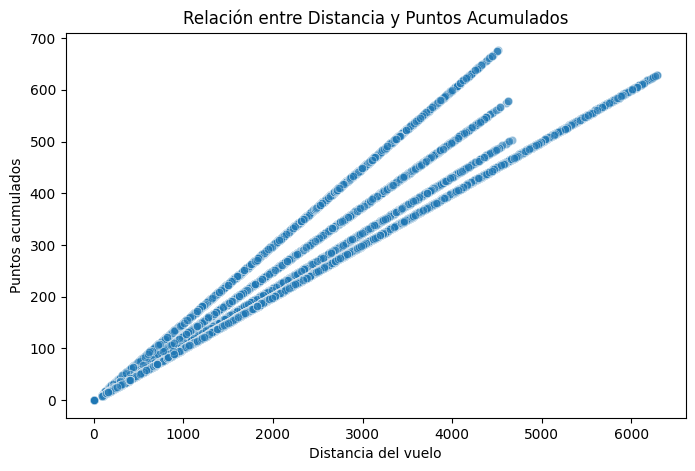

Correlación Pearson: 0.995
Correlación Spearman: 0.998


In [48]:
# Relación entre Distance y Points Accumulated
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Distance", y="Points Accumulated", alpha=0.5)
plt.title("Relación entre Distancia y Puntos Acumulados")
plt.xlabel("Distancia del vuelo")
plt.ylabel("Puntos acumulados")
plt.show()

# Calcular correlaciones
corr_pearson = df[["Distance", "Points Accumulated"]].corr(method="pearson").iloc[0,1]
corr_spearman = df[["Distance", "Points Accumulated"]].corr(method="spearman").iloc[0,1]

print("Correlación Pearson:", round(corr_pearson, 3))
print("Correlación Spearman:", round(corr_spearman, 3))

He elegido un diagrama de dispersión porque se ve claramentre si dos variables están relacionadas. Aquí queremos ver si cuando aumenta la distancia del vuelo también aumentan los puntos acumulados.

Visualmente podemos observar si los puntos siguen un patrón ascendente, descendete o  si están dispersos por una tendendia clara.

Las correlaciones Pearson y spearman nos ayudan ha confirmar:
  - Pearson -si la relacón es lineal
  - Spearman - si la relacion es monotònica aunque no sea lineal.

Esto permite decidir que tipo de anñalisis es mas adecuada en segújn la forma de los datos

<function matplotlib.pyplot.show(close=None, block=None)>

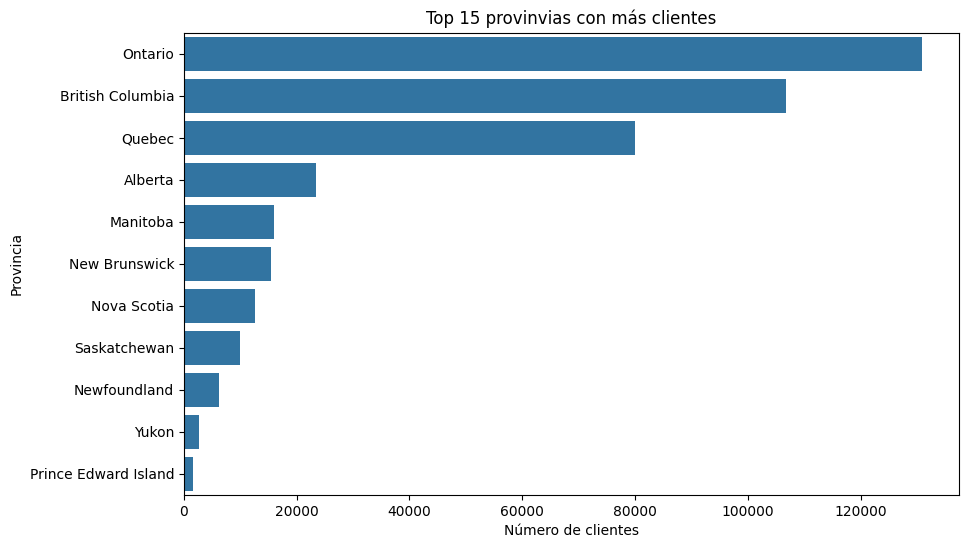

In [49]:
# Distribución de clientes por provincia
plt.figure(figsize=(10,6))
top_provincias = df["Province"].value_counts().head(15)

sns.barplot(x=top_provincias.values, y=top_provincias.index)
plt.title("Top 15 provinvias con más clientes")
plt.xlabel("Número de clientes")
plt.ylabel("Provincia")
plt.show

Uso un gráfico de barras porque me permite comparar de manera clara cuántos clientes hay en cada provincia.
Como hay mhcbas provincias, mostrar las 15 más frecuentes permite obtener una visión má clara sin sobresaturar la grafica.

Se identifican las zonas donde  se concentral la mayor parte de clientes. Esto es 
útil para:
  - segmentar campañas.
  -  Comprender áreas de mayor actividad.
  - Detectar regiones con potencial de crecimiento.

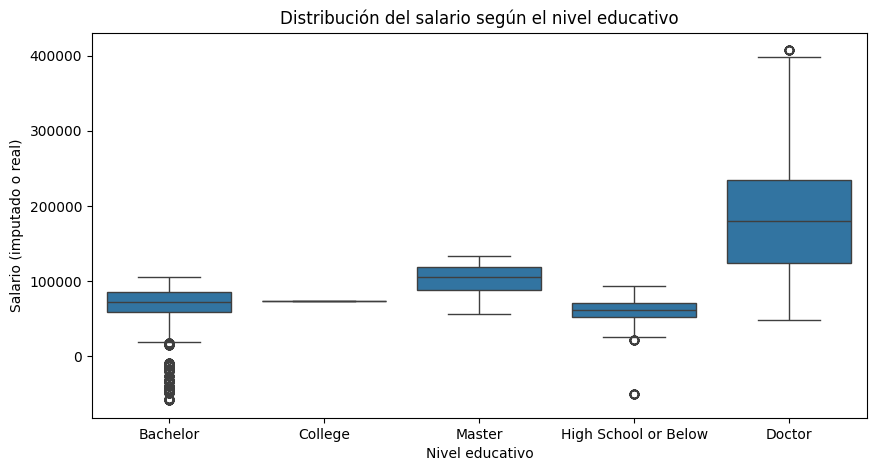

In [50]:
# Salario promedio por nivel educativo
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Education", y="Salary_imputado")
plt.title("Distribución del salario según el nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario (imputado o real)")
plt.show()

Uso un boxplot porque permite comparar no solo el salario promedio sino tambien la dispersión y los valors atípocos para cada nivel educativo.
Podemos observar que:
 - Que nivel educativo tiene mayor mediana salarial-
 - Si existen grandes diferencias entre los niveles.
 - Si hay mucha variavilidad dentro de un grupo educativo.

Esto ayuda a entender si la esucación influye en el salario y cómo.

Loyalty Card
Star      45.42
Nova      33.92
Aurora    20.67
Name: proportion, dtype: float64


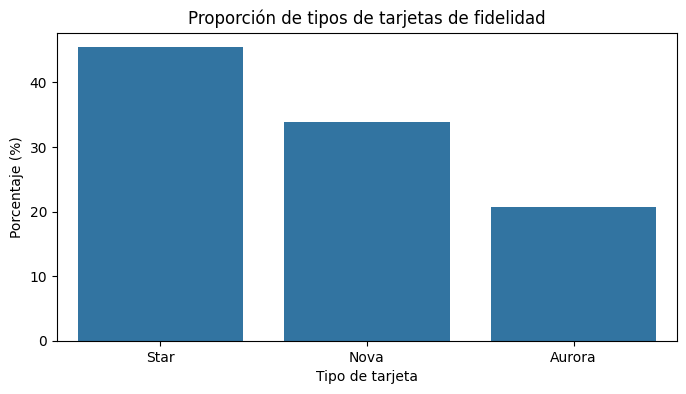

In [52]:
proporciones = df["Loyalty Card"].value_counts(normalize=True) * 100
proporciones = proporciones.round(2)

plt.figure(figsize=(8,4))
sns.barplot(x=proporciones.index, y=proporciones.values)
plt.title("Proporción de tipos de tarjetas de fidelidad")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Tipo de tarjeta")
plt.show

print(proporciones)

Uso un bartplot porque es ideal para comparar proporciones entre categorías.

Podemos interpretar que tipo de tarjeta es la más común entre lso clientes cuáles son menos populares.

Esto puede servir para:
 - Definir estrategias de fidelidad.
 - Entender que categorias podrían necesitar más incentivos